In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv("Dataset\phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [21]:
data.shape

(11054, 32)

In [22]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [23]:
data = data.drop(["Index"],axis = 1)

In [24]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np

In [27]:
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

In [28]:
conf_matrices = {}


In [29]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Deep Learning': MLPClassifier(random_state=42)
}

In [30]:
y_train_mapped = (y_train + 1) // 2
y_test_mapped = (y_test + 1) // 2

In [31]:
y__train = y_train_mapped
y_test = y_test_mapped

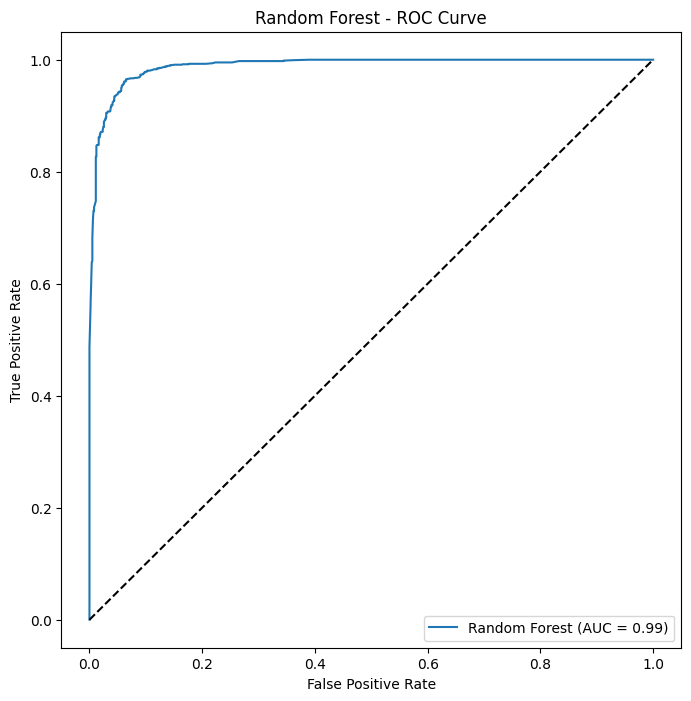

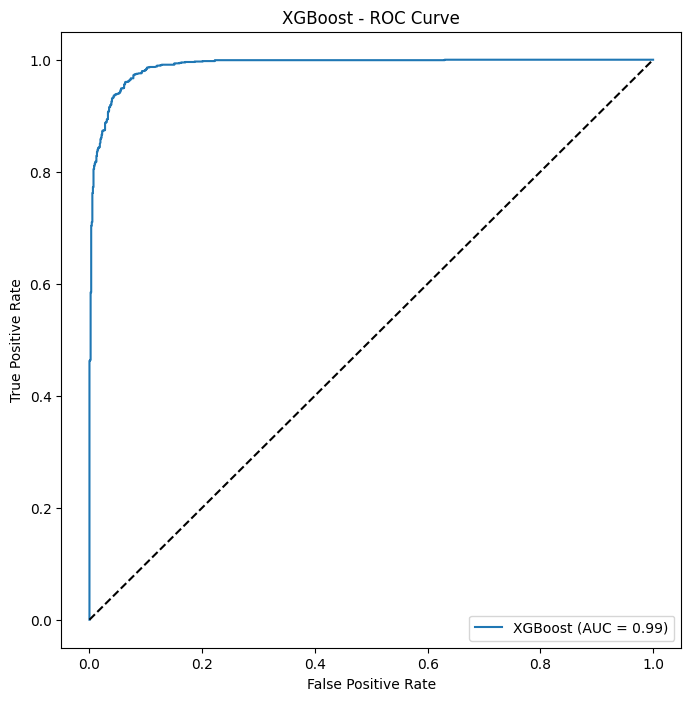

[LightGBM] [Info] Number of positive: 4922, number of negative: 3921
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 8843, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556598 -> initscore=0.227368
[LightGBM] [Info] Start training from score 0.227368
[LightGBM] [Info] Number of positive: 988, number of negative: 780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 1768, number of used features: 30
[LightGBM] [Info] [binary:BoostF

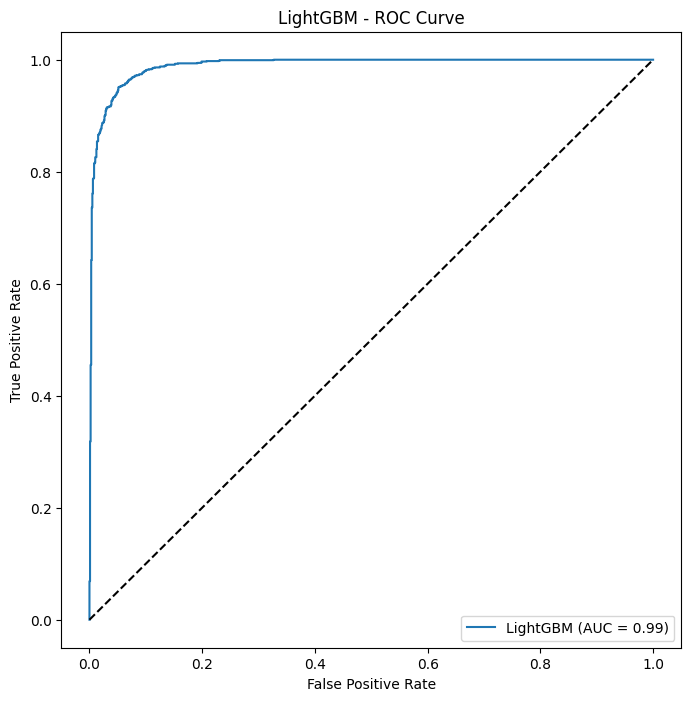

Learning rate set to 0.02613
0:	learn: 0.6423228	total: 138ms	remaining: 2m 17s
1:	learn: 0.5969265	total: 149ms	remaining: 1m 14s
2:	learn: 0.5561690	total: 158ms	remaining: 52.6s
3:	learn: 0.5235204	total: 167ms	remaining: 41.5s
4:	learn: 0.4928790	total: 172ms	remaining: 34.3s
5:	learn: 0.4661307	total: 177ms	remaining: 29.4s
6:	learn: 0.4430490	total: 182ms	remaining: 25.8s
7:	learn: 0.4192661	total: 187ms	remaining: 23.2s
8:	learn: 0.3979936	total: 191ms	remaining: 21.1s
9:	learn: 0.3808327	total: 196ms	remaining: 19.4s
10:	learn: 0.3654584	total: 202ms	remaining: 18.1s
11:	learn: 0.3527810	total: 207ms	remaining: 17s
12:	learn: 0.3359832	total: 212ms	remaining: 16.1s
13:	learn: 0.3229568	total: 218ms	remaining: 15.4s
14:	learn: 0.3128340	total: 224ms	remaining: 14.7s
15:	learn: 0.3009234	total: 230ms	remaining: 14.2s
16:	learn: 0.2893034	total: 236ms	remaining: 13.6s
17:	learn: 0.2818343	total: 240ms	remaining: 13.1s
18:	learn: 0.2735620	total: 247ms	remaining: 12.8s
19:	learn: 0

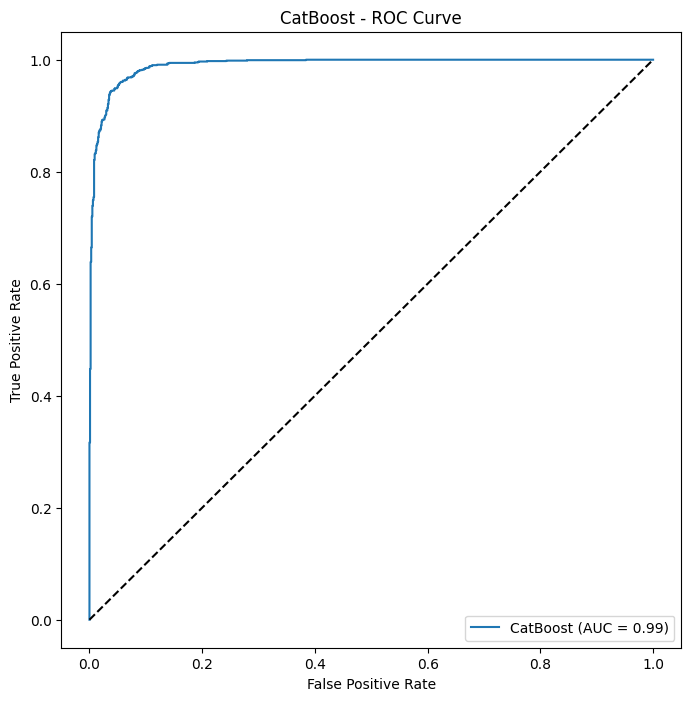

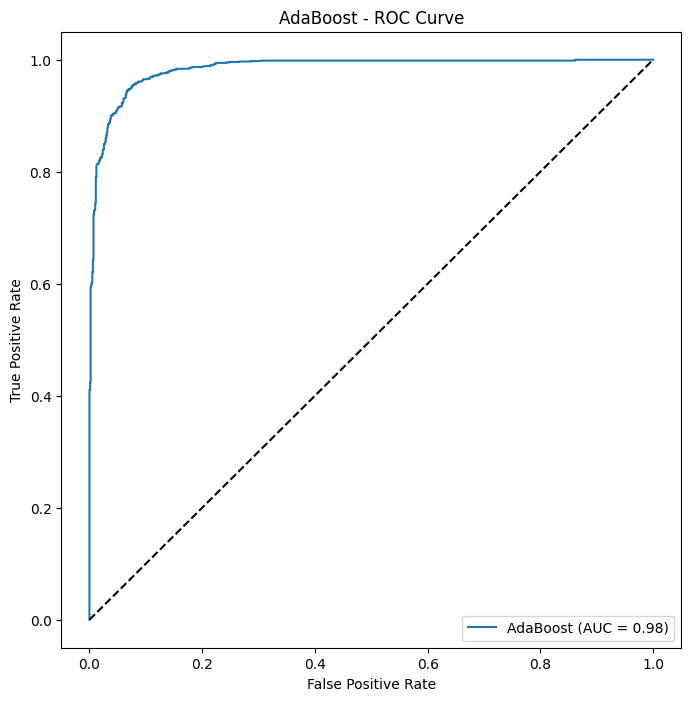

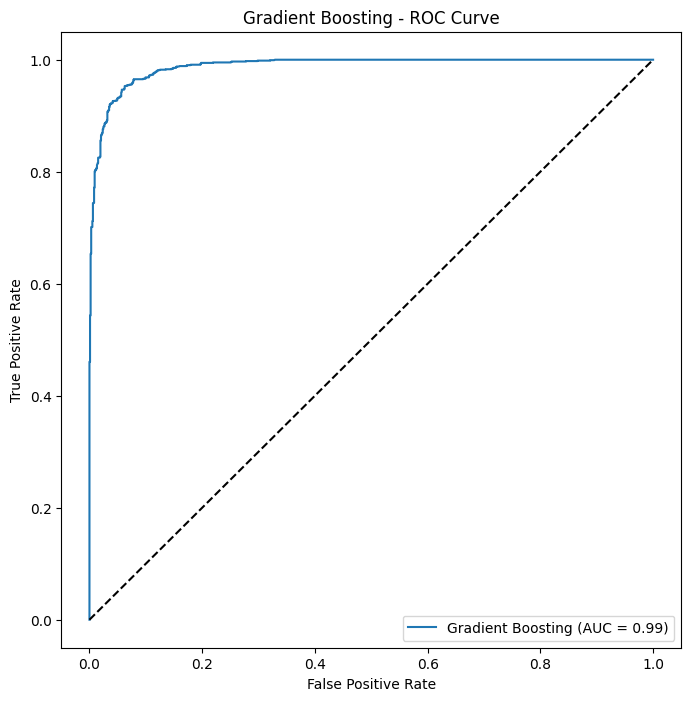

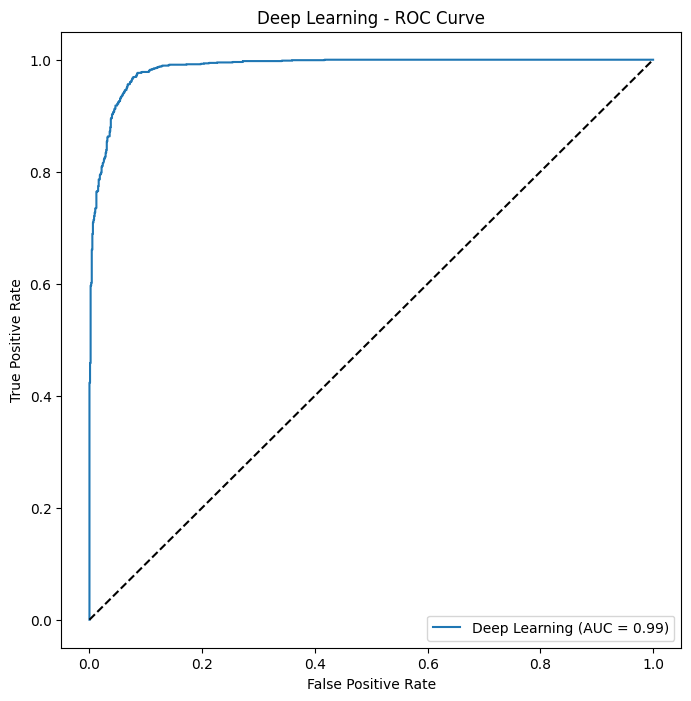


Random Forest Metrics:
Accuracy: 0.9665
Precision: 0.9665
Recall: 0.9665
F1 Score: 0.9665

XGBoost Metrics:
Accuracy: 0.9697
Precision: 0.9699
Recall: 0.9697
F1 Score: 0.9697

LightGBM Metrics:
Accuracy: 0.9670
Precision: 0.9670
Recall: 0.9670
F1 Score: 0.9670

CatBoost Metrics:
Accuracy: 0.9701
Precision: 0.9702
Recall: 0.9701
F1 Score: 0.9701

AdaBoost Metrics:
Accuracy: 0.9380
Precision: 0.9382
Recall: 0.9380
F1 Score: 0.9379

Gradient Boosting Metrics:
Accuracy: 0.9493
Precision: 0.9494
Recall: 0.9493
F1 Score: 0.9493

Deep Learning Metrics:
Accuracy: 0.9674
Precision: 0.9675
Recall: 0.9674
F1 Score: 0.9674


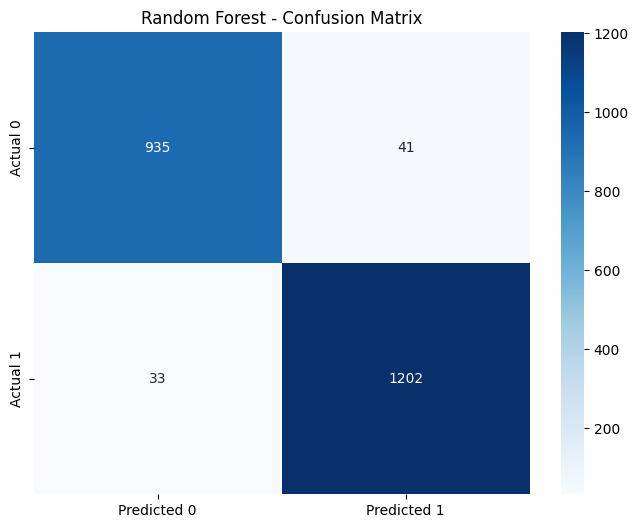

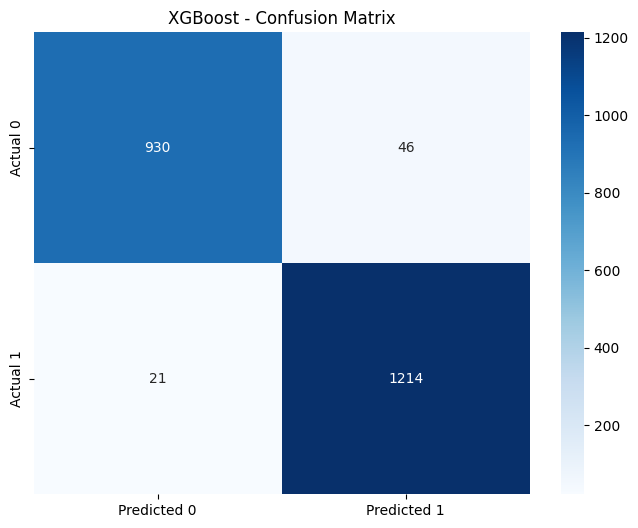

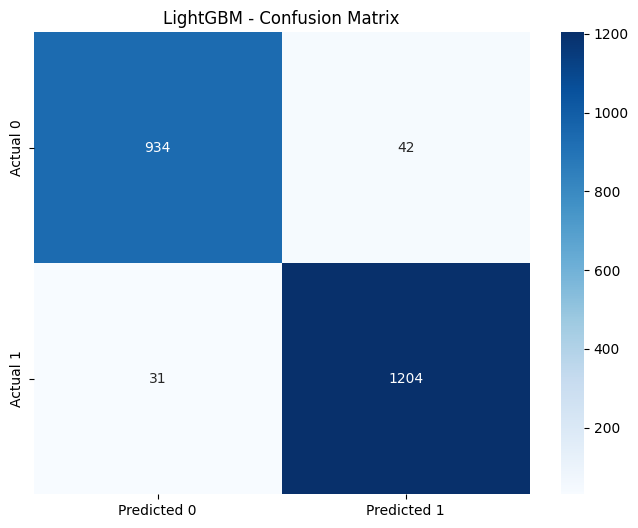

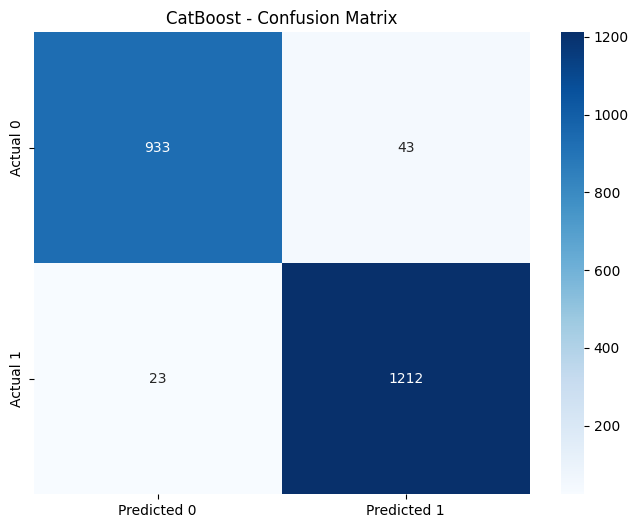

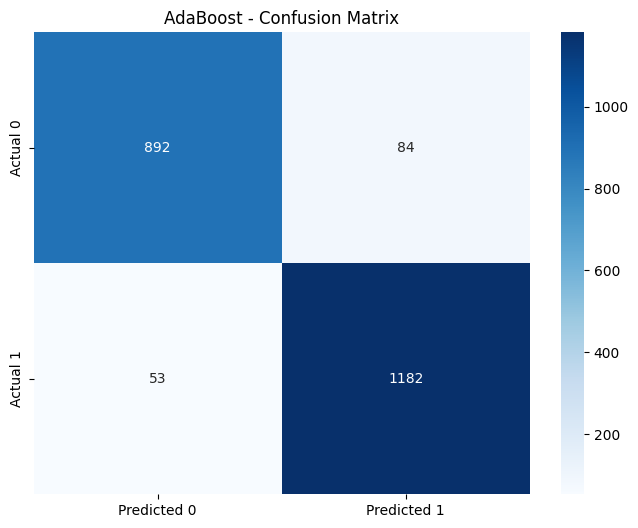

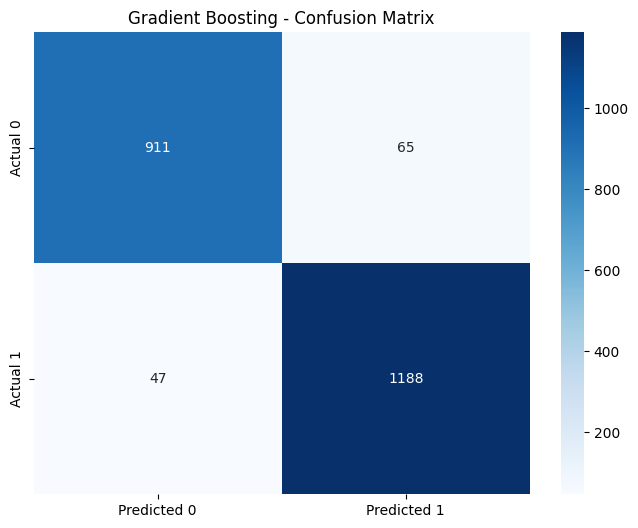

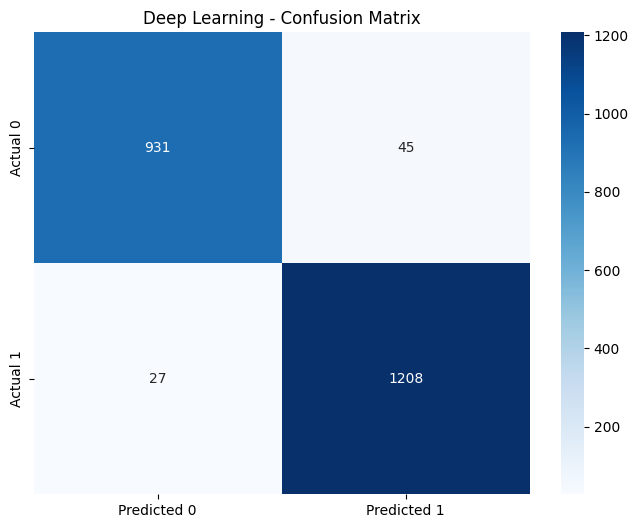

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Map -1 to 0 and 1 to 1 in both training and testing sets
y_train_mapped = (y_train + 1) // 2
y_test_mapped = (y_test + 1) // 2

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),  # Use class_weight='balanced'
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Deep Learning': MLPClassifier(random_state=42)
}

# Initialize metrics dictionaries
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Initialize confusion matrices
conf_matrices = {}

# Train and evaluate each classifier with mapped labels
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train_mapped)
    y_pred = classifier.predict(X_test)
    
    # Calculate metrics
    accuracy_scores[name] = accuracy_score(y_test_mapped, y_pred)
    precision_scores[name] = precision_score(y_test_mapped, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test_mapped, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test_mapped, y_pred, average='weighted')
    
    # Generate confusion matrix
    conf_matrices[name] = confusion_matrix(y_test_mapped, y_pred)

    # Generate ROC curve
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    y_probas = cross_val_predict(classifier, X_test, y_test_mapped, cv=skf, method="predict_proba")

    # Assuming binary classification, you may need to modify this part for multi-class classification
    fpr, tpr, thresholds = roc_curve(y_test_mapped, y_probas[:, 1])
    auc_score = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend()
    plt.show()

# Display metrics
for name in classifiers.keys():
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {accuracy_scores[name]:.4f}")
    print(f"Precision: {precision_scores[name]:.4f}")
    print(f"Recall: {recall_scores[name]:.4f}")
    print(f"F1 Score: {f1_scores[name]:.4f}")

# Display confusion matrices
for name in classifiers.keys():
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrices[name], annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


In [1]:
from prettytable import PrettyTable

# Data
models = ["Random Forest", "XGBoost", "LightGBM", "CatBoost", "AdaBoost", "Gradient Boosting", "Deep Learning"]
accuracy = [0.9665, 0.9697, 0.9670, 0.9701, 0.9380, 0.9493, 0.9674]
precision = [0.9665, 0.9699, 0.9670, 0.9702, 0.9382, 0.9494, 0.9675]
recall = [0.9665, 0.9697, 0.9670, 0.9701, 0.9380, 0.9493, 0.9674]
f1_score = [0.9665, 0.9697, 0.9670, 0.9701, 0.9379, 0.9493, 0.9674]

# Create the table
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

for data in zip(models, accuracy, precision, recall, f1_score):
    table.add_row(data)

# Print the table
print(table)


+-------------------+----------+-----------+--------+----------+
|       Model       | Accuracy | Precision | Recall | F1 Score |
+-------------------+----------+-----------+--------+----------+
|   Random Forest   |  0.9665  |   0.9665  | 0.9665 |  0.9665  |
|      XGBoost      |  0.9697  |   0.9699  | 0.9697 |  0.9697  |
|      LightGBM     |  0.967   |   0.967   | 0.967  |  0.967   |
|      CatBoost     |  0.9701  |   0.9702  | 0.9701 |  0.9701  |
|      AdaBoost     |  0.938   |   0.9382  | 0.938  |  0.9379  |
| Gradient Boosting |  0.9493  |   0.9494  | 0.9493 |  0.9493  |
|   Deep Learning   |  0.9674  |   0.9675  | 0.9674 |  0.9674  |
+-------------------+----------+-----------+--------+----------+


In [2]:
import pandas as pd

# Data
data = {
    "Model": ["Random Forest", "XGBoost", "LightGBM", "CatBoost", "AdaBoost", "Gradient Boosting", "Deep Learning"],
    "Accuracy": [0.9665, 0.9697, 0.9670, 0.9701, 0.9380, 0.9493, 0.9674],
    "Precision": [0.9665, 0.9699, 0.9670, 0.9702, 0.9382, 0.9494, 0.9675],
    "Recall": [0.9665, 0.9697, 0.9670, 0.9701, 0.9380, 0.9493, 0.9674],
    "F1 Score": [0.9665, 0.9697, 0.9670, 0.9701, 0.9379, 0.9493, 0.9674]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


               Model  Accuracy  Precision  Recall  F1 Score
0      Random Forest    0.9665     0.9665  0.9665    0.9665
1            XGBoost    0.9697     0.9699  0.9697    0.9697
2           LightGBM    0.9670     0.9670  0.9670    0.9670
3           CatBoost    0.9701     0.9702  0.9701    0.9701
4           AdaBoost    0.9380     0.9382  0.9380    0.9379
5  Gradient Boosting    0.9493     0.9494  0.9493    0.9493
6      Deep Learning    0.9674     0.9675  0.9674    0.9674
